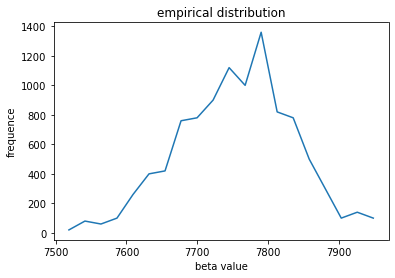

In [3]:
import numpy as np
from sklearn import linear_model
import pandas as pd
import random
import matplotlib.pyplot as plt

def sam_calc(data, num=500, capacity=5000):
    sample_num = list(data.index)
    
    ans = []
    for i in range(num):
        sam = random.sample(sample_num,capacity)
        ans.append(data.iloc[sam])
    return ans

def fn(data, num):
    min = np.min(data)
    max = np.max(data)
    _range = (max - min)/num
    freq_y = [0 for _ in range(num)]
    freq_x = [min + _range*(i+0.5) for i in range(num)]
    for i in range(num):
        for j in range(len(data)):
            if data[j] == max:
                freq_y[-1] +=1
            else:
                freq_y[int((data[j] - min)//_range)] += 1 
    return freq_x, freq_y

data = pd.read_csv(r"C:\Users\giao\Desktop\作业\抽样技术\diamonds.csv")
samples = sam_calc(data)
betas = []
for data in samples:
    y = data.iloc[:, 0]
    x = data.iloc[:, [1]]
    model = linear_model.LinearRegression()
    model.fit(x,y)
    beta = model.coef_[0]
    betas.append(beta)
mean = np.mean(betas)
var = np.var(betas)
x, y = fn(betas, 20)
plt.plot(x, y)
plt.xlabel('beta value')
plt.ylabel('frequence')
plt.title('empirical distribution')
plt.show()